In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
#Read Data
Data = pd.read_csv('Housing.csv')
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
#Check Data Information
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
#Perform Descriptive Statistics
Data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
#Check Unique Values of every row for every column
N = Data.nunique(axis = 0)
print(f'Number of Unique Values in Every Column:\n{N}\n')

Number of Unique Values in Every Column:
price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64



In [6]:
#Count NaN Values in Data
CountNaN = Data.isna().sum()
print(f'Number of Missing Values in Every Variable:\n{CountNaN}\n')

Number of Missing Values in Every Variable:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64



In [7]:
#Change Categorical Variable mainroad into Numerical
Labels = {'yes': 1, 'no': 2}
Data['mainroad'] = Data['mainroad'].map(Labels)

In [8]:
#Change Categorical Variable guestroom into Numerical
Labels = {'yes': 1, 'no': 2}
Data['guestroom'] = Data['guestroom'].map(Labels)

In [9]:
#Change Categorical Variable basement into Numerical
Labels = {'yes': 1, 'no': 2}
Data['basement'] = Data['basement'].map(Labels)

In [10]:
#Change Categorical Variable hotwaterheating into Numerical
Labels = {'yes': 1, 'no': 2}
Data['hotwaterheating'] = Data['hotwaterheating'].map(Labels)

In [11]:
#Change Categorical Variable airconditioning into Numerical
Labels = {'yes': 1, 'no': 2}
Data['airconditioning'] = Data['airconditioning'].map(Labels)

In [12]:
#Change Categorical Variable prefarea into Numerical
Labels = {'yes': 1, 'no': 2}
Data['prefarea'] = Data['prefarea'].map(Labels)

In [13]:
#Change Categorical Variable furnishingstatus into Numerical
Labels = {'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3}
Data['furnishingstatus'] = Data['furnishingstatus'].map(Labels)
Data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,2,2,2,1,2,1,1
1,12250000,8960,4,4,4,1,2,2,2,1,3,2,1
2,12250000,9960,3,2,2,1,2,1,2,2,2,1,2
3,12215000,7500,4,2,2,1,2,1,2,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,2,1,2,2,1


In [14]:
#Data Normalisation
Scaler = MinMaxScaler()
SC = ['price', 'area']
Data[SC] = Scaler.fit_transform(Data[SC])
Data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,4,2,3,1,2,2,2,1,2,1,1
1,0.909091,0.502405,4,4,4,1,2,2,2,1,3,2,1
2,0.909091,0.571134,3,2,2,1,2,1,2,2,2,1,2
3,0.906061,0.402062,4,2,2,1,2,1,2,1,3,1,1
4,0.836364,0.396564,4,1,2,1,1,1,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,2,1,1,1,2,1,2,2,2,2,3
541,0.001485,0.051546,3,1,1,2,2,2,2,2,0,2,2
542,0.000000,0.135395,2,1,1,1,2,2,2,2,0,2,3
543,0.000000,0.086598,3,1,1,2,2,2,2,2,0,2,1


In [15]:
#Preparing Model Training/Testing Data
X = Data.drop('price', axis = 1)
X = pd.get_dummies(X, drop_first = True)
Y = Data['price']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

In [16]:
#Model Training and Testing
Regressor = LinearRegression()
Regressor.fit(X_Train, Y_Train)

Y_Tr_Pred = Regressor.predict(X_Train)
Y_Te_Pred = Regressor.predict(X_Test)

In [17]:
X_Train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
179,0.105155,3,2,2,1,2,2,2,2,2,2,2
113,0.547766,3,1,1,1,2,1,2,2,2,1,1
535,0.117526,2,1,1,1,2,2,2,2,1,2,3
525,0.136770,2,1,1,1,2,2,2,2,0,2,3
543,0.086598,3,1,1,2,2,2,2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62,0.315464,4,2,2,1,2,2,2,1,1,2,1
355,0.453608,3,1,1,1,2,2,2,2,2,2,1
329,0.158763,3,1,2,1,2,2,2,2,0,2,1
412,0.065979,3,1,2,1,2,1,2,2,0,1,3


In [18]:
X_Test

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
327,0.331959,3,1,2,2,2,2,2,1,1,2,2
339,0.105155,4,2,2,1,2,2,2,2,0,2,1
399,0.391753,2,1,1,1,2,2,2,2,1,2,2
341,0.105155,2,2,1,1,2,1,2,2,2,2,2
534,0.092784,4,1,2,1,2,2,2,2,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.298969,3,1,2,1,2,2,1,2,1,1,2
351,0.134021,2,1,1,1,2,2,2,2,0,2,2
511,0.105155,3,1,1,2,2,2,2,2,0,2,3
208,0.090722,3,1,3,1,2,2,2,2,0,2,2


In [19]:
Y_Train

179    0.300000
113    0.375152
535    0.030303
525    0.051515
543    0.000000
         ...   
62     0.460606
355    0.175152
329    0.193939
412    0.145455
332    0.187879
Name: price, Length: 381, dtype: float64

In [20]:
Y_Test

327    0.193939
339    0.184848
399    0.151515
341    0.181818
534    0.030303
         ...   
80     0.422424
351    0.175758
511    0.066667
208    0.272727
118    0.363636
Name: price, Length: 164, dtype: float64

In [21]:
Y_Tr_Pred

array([0.26413464, 0.38714266, 0.0932192 , 0.07576593, 0.08275624,
       0.39270402, 0.12197588, 0.20900802, 0.37662856, 0.04525602,
       0.09444989, 0.25481109, 0.43443634, 0.2211275 , 0.46755227,
       0.39227977, 0.24428923, 0.16787652, 0.13214096, 0.49485106,
       0.42668946, 0.32564286, 0.2477935 , 0.31575151, 0.07576593,
       0.60860617, 0.36273121, 0.07596598, 0.13237374, 0.31233332,
       0.2980774 , 0.53204227, 0.08159504, 0.03812625, 0.28586331,
       0.37020531, 0.07265403, 0.09076552, 0.12552816, 0.19846687,
       0.13746372, 0.17956476, 0.30091983, 0.53816273, 0.48966902,
       0.44439375, 0.18790535, 0.14120965, 0.33766382, 0.14410134,
       0.04746633, 0.42913115, 0.09323342, 0.36239834, 0.09807114,
       0.24975203, 0.21611647, 0.32003416, 0.44009495, 0.38710115,
       0.1213523 , 0.38969554, 0.15379909, 0.43587026, 0.19731993,
       0.27047457, 0.15168079, 0.2615457 , 0.18590409, 0.28250574,
       0.46605724, 0.1531088 , 0.46389747, 0.26570991, 0.19857

In [22]:
Y_Te_Pred

array([0.28047951, 0.25897744, 0.20045673, 0.23368245, 0.14421044,
       0.17408514, 0.18856282, 0.47589787, 0.16646671, 0.2083434 ,
       0.47030232, 0.3532841 , 0.07554365, 0.13619754, 0.33117006,
       0.12834151, 0.23161553, 0.32855732, 0.18036319, 0.08376797,
       0.21047028, 0.10722501, 0.27056611, 0.34131871, 0.19832332,
       0.15606107, 0.11147952, 0.5090305 , 0.52368034, 0.10124142,
       0.27418095, 0.27285998, 0.25779285, 0.07487681, 0.45653744,
       0.18588654, 0.20900802, 0.27613834, 0.21460694, 0.33114346,
       0.20416979, 0.24104039, 0.21946382, 0.40877732, 0.40679583,
       0.42398957, 0.1858192 , 0.2158115 , 0.05287176, 0.42153483,
       0.27696662, 0.41796478, 0.32781638, 0.25399939, 0.18700578,
       0.19245362, 0.27690254, 0.27191752, 0.32511704, 0.39955543,
       0.08499045, 0.26280418, 0.34586672, 0.32168677, 0.46415133,
       0.4366694 , 0.13781237, 0.40601821, 0.25464887, 0.25777552,
       0.2614337 , 0.20046773, 0.41753153, 0.10408248, 0.08465

In [23]:
#Train and Test Data Model Evaluation
Test_MSE = mean_squared_error(Y_Test, Y_Te_Pred)
Test_MAE = mean_absolute_error(Y_Test, Y_Te_Pred)
Test_RMSE = np.sqrt(Test_MSE)

Train_MSE = mean_squared_error(Y_Train, Y_Tr_Pred)
Train_MAE = mean_absolute_error(Y_Train, Y_Tr_Pred)
Train_RMSE = np.sqrt(Train_MSE)

In [24]:
#Print Test Set Model Evaluation
print('Test Set:')
print('\nMean Squared Error: ', Test_MSE)
print('Mean Absolute Error: ', Test_MAE)
print('Root Mean Square Error: ', Test_RMSE)

Test Set:

Mean Squared Error:  0.009256315924960958
Mean Absolute Error:  0.07113237208359516
Root Mean Square Error:  0.0962097496356838


In [25]:
#Print Train Set Model Evaluation
print('Train Set:')
print('\nMean Squared Error: ', Train_MSE)
print('Mean Absolute Error: ', Train_MAE)
print('Root Mean Square Error: ', Train_RMSE)

Train Set:

Mean Squared Error:  0.008171583154797674
Mean Absolute Error:  0.06684206754287085
Root Mean Square Error:  0.09039680942819649


In [26]:
#Make Table Displaying Predicted vs Actual Price Values
Table = pd.DataFrame({'Actual': Y_Test, 'Predicted': Y_Te_Pred})
print(Table)

       Actual  Predicted
327  0.193939   0.280480
339  0.184848   0.258977
399  0.151515   0.200457
341  0.181818   0.233682
534  0.030303   0.144210
..        ...        ...
80   0.422424   0.339816
351  0.175758   0.093425
511  0.066667   0.051661
208  0.272727   0.173816
118  0.363636   0.346527

[164 rows x 2 columns]


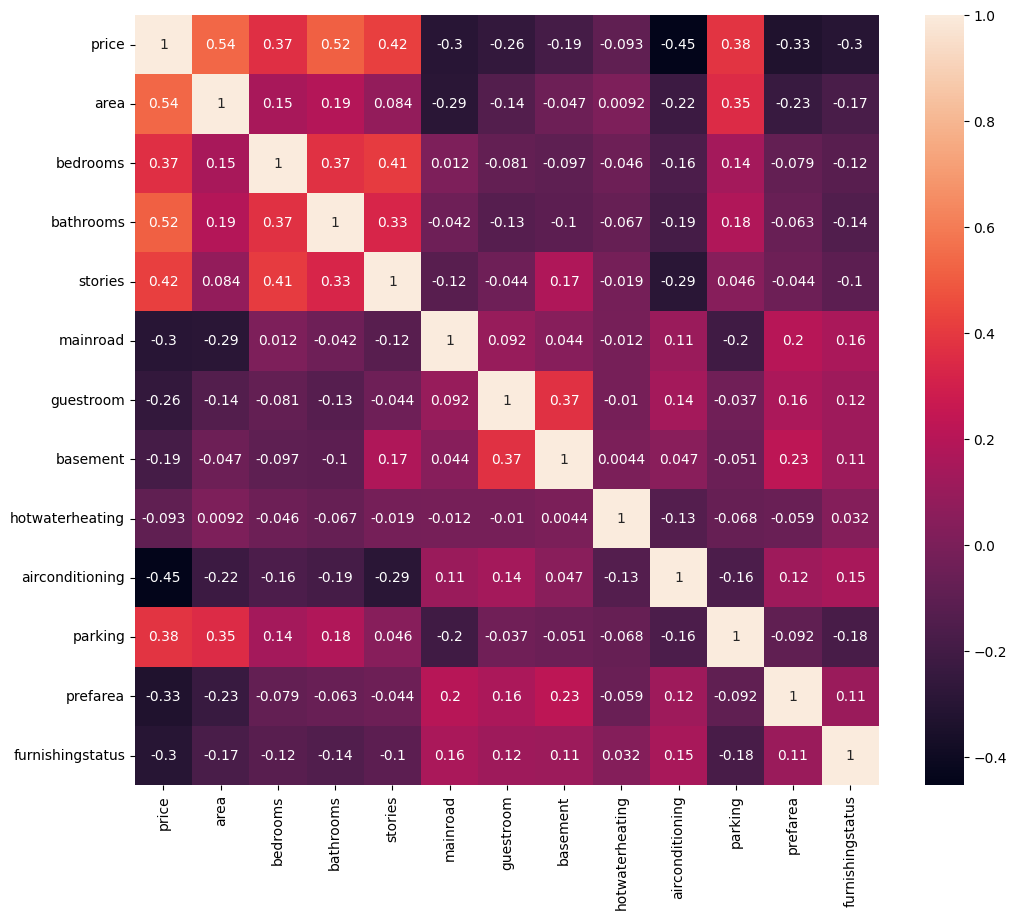

In [27]:
#Heatmap Visualisation
plt.figure(figsize=(12,10))
Correlation = Data.corr()
sns.heatmap(Correlation, annot = True)
plt.show()

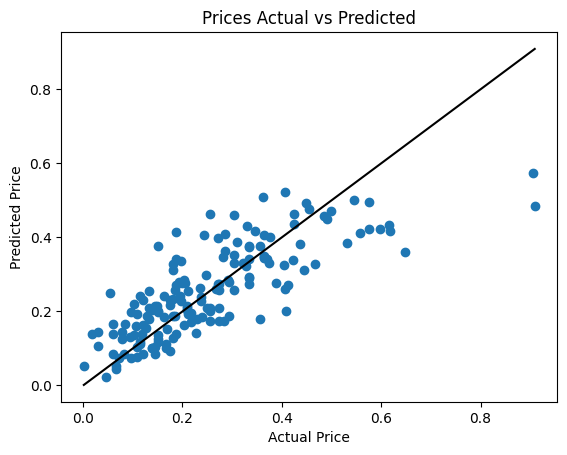

In [28]:
#Scatter Plot Visualisation
plt.scatter(Y_Test, Y_Te_Pred)
plt.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], color = 'black')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title("Prices Actual vs Predicted")
plt.show()